In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,KFold,train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [3]:
df=pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.isna().sum().sort_values()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


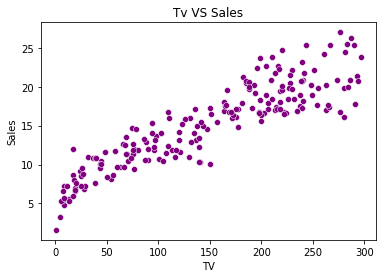

In [5]:
sns.scatterplot(df.TV,df.Sales,color='purple')
plt.title('Tv VS Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

**With Cross Validation**

In [6]:
X=df.drop('Sales',axis=1).values
y=df.Sales.values
kf=KFold(n_splits=6,shuffle=True,random_state=10)
model=LinearRegression()
cv=cross_val_score(model,X,y,cv=kf)
cv
##performance varying according to the split

array([0.8978087 , 0.91248789, 0.88967391, 0.90209487, 0.8751189 ,
       0.89623679])

In [7]:
np.mean(cv)

0.8955701753678457

In [8]:
np.std(cv)

0.01145466935386987

**Without Cross Validation**

In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3)
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.902124198186562

In [12]:
pred=model.predict(xtest)
pred



array([ 8.25077141, 14.67650517, 10.68663233, 13.27283669, 18.98106528,
        6.33054103, 10.19046747, 13.20835776, 15.31882945, 15.8548172 ,
       20.98511559,  8.0248277 , 22.03982995,  9.02434626, 15.99494017,
       11.41766254, 16.5185417 , 20.37000208, 23.57773992, 18.52447671,
       22.23491201, 12.48709483, 12.40976838, 11.09899585,  8.05585537,
       20.00366619,  9.57501389, 17.14182744,  5.70842663, 13.45683345,
       17.00265437, 24.82935999,  8.27134442, 13.96598451, 13.57406309,
       17.17354887, 17.88879369, 24.85873746, 21.7257865 , 19.30375453,
        9.11262448,  5.58749949, 17.37756797, 17.21531579, 15.91410833,
        9.12101861,  8.98206267, 18.10017314, 12.81921128, 18.78441302,
        8.28344021, 17.95711171, 15.59192021, 21.43570555,  7.44039136,
       20.19413732, 24.86359911, 21.34073557,  8.8146165 , 19.49243304])

In [13]:
model.score(xtrain,ytrain)

0.9012589943689098